# Little Matplotlib Cookbook

In [1]:
import sys
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
my_seed = 19831003

## First Examples

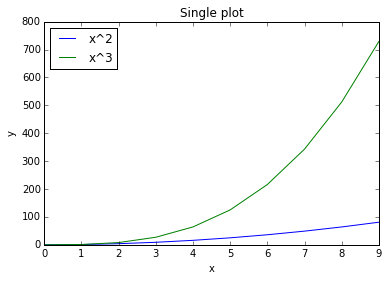

In [4]:
np.random.seed(my_seed)

# data
x = np.array(range(10))
y = np.square(x)
z = np.power(x, 3)

# plot
fig, ax = plt.subplots()
ax.set(title = "Single plot", xlabel = "x", ylabel = "y")
_tmp_0 = ax.plot(x, y, label = 'x^2')
_tmp_1 = ax.plot(x, z, label = 'x^3')
_l = ax.legend(loc = 'upper left')

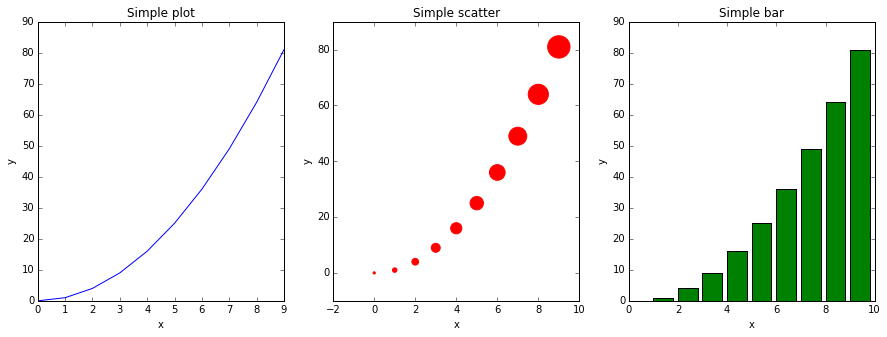

In [5]:
np.random.seed(my_seed)

# data
x = np.array(range(10))
y = np.square(x)
weight = 5 * np.square(1 + x)

# plotting
fig, ax = plt.subplots(1,3, figsize = (15, 5))
ax[0].set(title = "Simple plot", xlabel = "x", ylabel = "y")
_tmp_0 = ax[0].plot(x, y, label = 'x^2', color = "blue")
ax[1].set(title = "Simple scatter", xlabel = "x", ylabel = "y")
_tmp_1 = ax[1].scatter(x, y, marker = 'o', s = weight, color = 'red')
ax[2].set(title = "Simple bar", xlabel = "x", ylabel = "y")
_tmp_2 = ax[2].bar(x, y, color = "green")


## Scatter

** Remember **
* _x, y_ are array-like (e.g., lists of floats or 1D numpy arrays),
* _c / color_, _s / size_, _linewidths_, _edgecolors_ are either single value or array-like,
* _marker_ is single value.

### Colors, Sizes, Marker

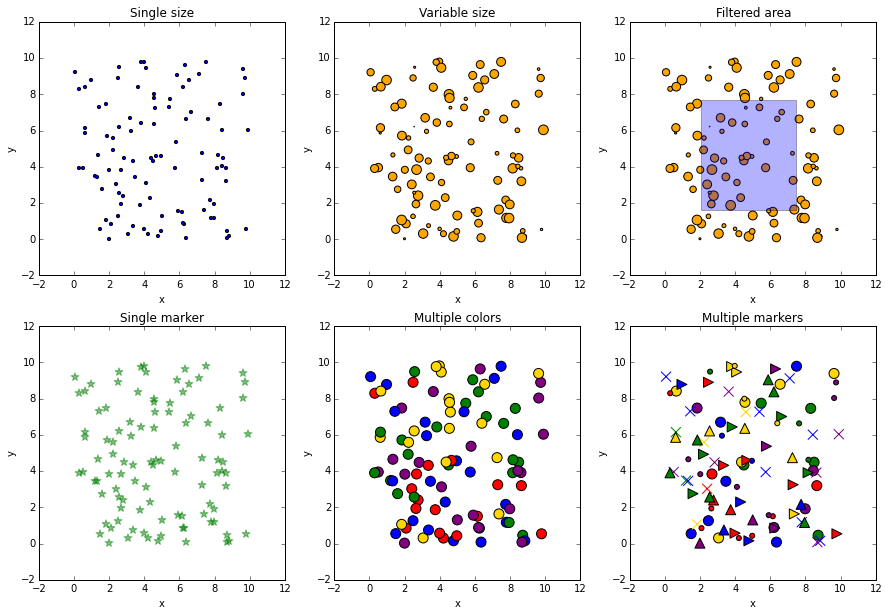

In [6]:
np.random.seed(my_seed)

# data
N = 100
data = 10 * np.random.rand(2, N)
size = 100 * np.random.rand(1, N)
COLORS = ['purple', 'red', 'blue', 'green', 'gold']
color_idx_list = np.random.choice(range(len(COLORS)), N)
MARKERS = ['o', 'x', '^', '>', '.']
marker_list = [MARKERS[m] for m in np.random.choice(range(len(MARKERS)), N)]

x_left = np.mean(data[0]) - np.std(data[0]); x_right = np.mean(data[0]) + np.std(data[0])
x_range = [x_left, x_right]
y_bottom = np.mean(data[1]) - np.std(data[1]); y_upper = np.mean(data[1]) + np.std(data[1])

# plotting
fig, ax = plt.subplots(2,3, figsize = (15, 10))

ax[0,0].set(title = "Single size", xlabel = "x", ylabel = "y")
_tmp_0 = ax[0,0].scatter(data[0], data[1], c = "blue", s = 10)
ax[0,1].set(title = "Variable size", xlabel = "x", ylabel = "y")
_tmp_1 = ax[0,1].scatter(data[0], data[1], c = "orange", s = size)
ax[0,2].set(title = "Filtered area", xlabel = "x", ylabel = "y")
_tmp_2 = ax[0,2].scatter(data[0], data[1], c = "orange", s = size)
_tmp_2 = ax[0,2].fill_between(x_range, y_bottom, y_upper, alpha = 0.3)

ax[1,0].set(title = "Single marker", xlabel = "x", ylabel = "y")
_tmp_3 = ax[1,0].scatter(data[0], data[1], color = "green", s = 70, marker = "*", alpha = 0.5)

ax[1,1].set(title = "Multiple colors", xlabel = "x", ylabel = "y")
colors = [COLORS[c] for c in color_idx_list]
_tmp_4 = ax[1,1].scatter(data[0], data[1], c = colors, s = 100, marker = "o")

ax[1,2].set(title = "Multiple markers", xlabel = "x", ylabel = "y")
for i, marker in enumerate(MARKERS):
    # extract data points that correspond to single color and marker 
    IDX = [i for i,m in enumerate(marker_list) if m == marker]
    x = data[0][IDX]; y = data[1][IDX]; c = [COLORS[c] for c in color_idx_list[IDX]]
    _tmp_5 = ax[1,2].scatter(x, y, c = c, s = 100, marker = marker)

### Line widths and colors

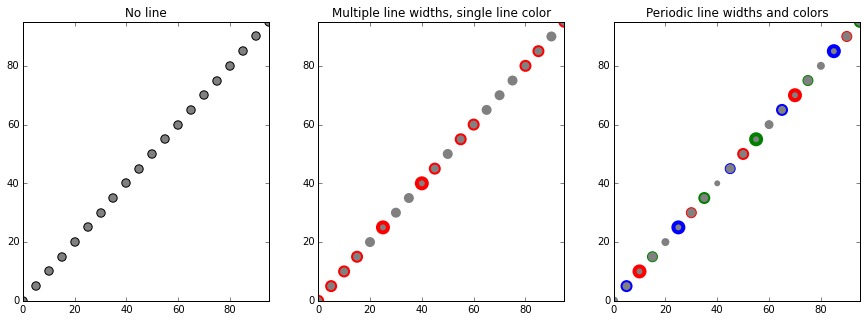

In [7]:
np.random.seed(my_seed)

# data
N = 100; step = 5
x = list(range(0, N, step))
y = x
widths = np.random.choice([0, 2, 4], len(x))
size = 100 * np.random.rand(1, len(x))

# plotting
fig, ax = plt.subplots(1, 3, figsize = (15, 5))
ax[0].set(title = 'No line', xlim = (min(x), max(x)), ylim = (min(y), max(y)))
_tmp_0 = ax[0].scatter(x, y, s = 70, c = 'grey')
ax[1].set(title = 'Multiple line widths, single line color', xlim = (min(x), max(x)), ylim = (min(y), max(y)))
_tmp_1 = ax[1].scatter(x, y, s = 100, c = 'grey', linewidths = widths, edgecolors = 'red')
ax[2].set(title = 'Periodic line widths and colors', xlim = (min(x), max(x)), ylim = (min(y), max(y)))
_tmp_2 = ax[2].scatter(x, y, s = 100, c = 'grey', linewidths = [1, 2, 4], edgecolors = ['White', 'blue', 'red', 'green'])


### Colors, sizes, etc are repeated

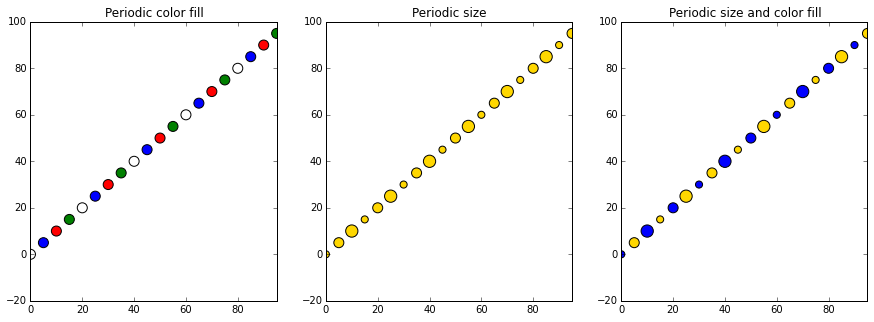

In [8]:
np.random.seed(my_seed)

# data
N = 100; step = 5
x = list(range(0, N, step))
y = x
widths = np.random.choice([0, 2, 4], len(x))
size = 100 * np.random.rand(1, len(x))

# plotting
fig, ax = plt.subplots(1, 3, figsize = (15, 5))

ax[0].set(title = 'Periodic color fill', xlim = (min(x), max(x)))
_tmp_3 = ax[0].scatter(x, y, s = 100, linewidths = 1, c = ['White', 'blue', 'red', 'green'])
ax[1].set(title = 'Periodic size', xlim = (min(x), max(x)))
_tmp_4 = ax[1].scatter(x, y, c = "gold", s = [50, 100, 150])
ax[2].set(title = 'Periodic size and color fill', xlim = (min(x), max(x)))
_tmp_5 = ax[2].scatter(x, y, c = ["blue", "gold"], s = [50, 100, 150])

### Specifying colors

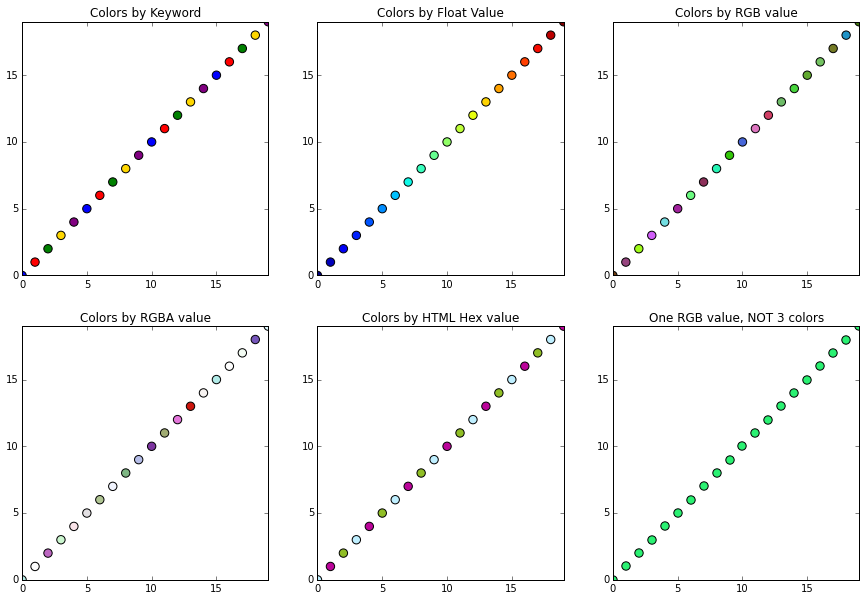

In [9]:
np.random.seed(my_seed)

# data
N = 20
x = range(N)
y = x


# plotting
fig, ax = plt.subplots(2,3, figsize = (15,10))

ax[0,0].set(title = "Colors by Keyword", xlim = (min(x), max(x)), ylim = (min(y), max(y)))
colors_kwd = ['blue', 'red', 'green', 'gold', 'purple']
_tmp_0 = ax[0,0].scatter(x, y, c = colors_kwd, s = 70)

ax[0,1].set(title = "Colors by Float Value", xlim = (min(x), max(x)), ylim = (min(y), max(y)))
colors_float = sorted(np.linspace(0, N, N))
# NOTE This would not work:
# colors_float = np.random.rand(5)
# When colors are defined as arrays of floats, the length of the array needs to be equal to
# the length N of the data -- except when it's 3 != N or 4 != N, in which case it is interpreted
# as one RGB or RGBA value. See also next example.
_tmp_1 = ax[0,1].scatter(x, y, c = colors_float, s = 70)

ax[0,2].set(title = "Colors by RGB value", xlim = (min(x), max(x)), ylim = (min(y), max(y)))
colors_rgb_tuples = np.random.rand(N, 3)
_tmp_2 = ax[0,2].scatter(x, y, c = colors_rgb_tuples, s = 70)

ax[1,0].set(title = "Colors by RGBA value", xlim = (min(x), max(x)), ylim = (min(y), max(y)))
colors_rgba_tuples = np.random.rand(N, 4)
_tmp_3 = ax[1,0].scatter(x, y, c = colors_rgba_tuples, s = 70)

ax[1,1].set(title = "Colors by HTML Hex value", xlim = (min(x), max(x)), ylim = (min(y), max(y)))
colors_html_hex = ['#bfefff', '#bb049a', '#90be25']
_tmp_4 = ax[1,1].scatter(x, y, c = colors_html_hex, s = 70)

ax[1,2].set(title = "One RGB value, NOT 3 colors", xlim = (min(x), max(x)), ylim = (min(y), max(y)))
one_rgb = np.random.rand(3)
_tmp_5 = ax[1,2].scatter(x, y, c = one_rgb, s = 70)

### RGB, RGBA, or array of floats?

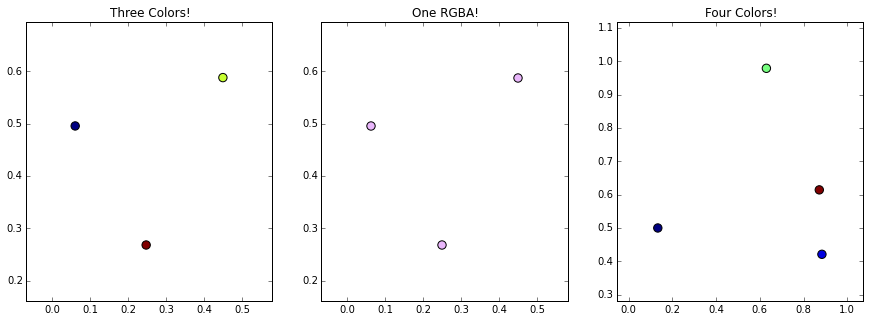

In [10]:
np.random.seed(my_seed)

# data -- 3 points
x = np.random.rand(3)
y = np.random.rand(3)
dx = (max(x) - min(x)) / 3
dy = (max(y) - min(y)) / 3

# plotting
fig, ax = plt.subplots(1, 3, figsize = (15, 5))

colors = np.random.rand(3)
ax[0].set(title = "Three Colors!", xlim = (min(x) - dx, max(x) + dx), ylim = (min(y) - dy, max(y) + dy))
_tmp = ax[0].scatter(x, y, c = colors, s = 70)

rgba = np.random.rand(4)
ax[1].set(title = "One RGBA!", xlim = (min(x) - dx, max(x) + dx), ylim = (min(y) - dy, max(y) + dy))
_tmp = ax[1].scatter(x, y, c = rgba, s = 70)


# new data -- 4 points
x = np.random.rand(4)
y = np.random.rand(4)
dx = (max(x) - min(x)) / 4
dy = (max(y) - min(y)) / 4


# plotting
four_colors = np.random.rand(4)
ax[2].set(title = "Four Colors!", xlim = (min(x) - dx, max(x) + dx), ylim = (min(y) - dy, max(y) + dy))
_tmp = ax[2].scatter(x, y, c = four_colors, s = 70)


### Using colormaps

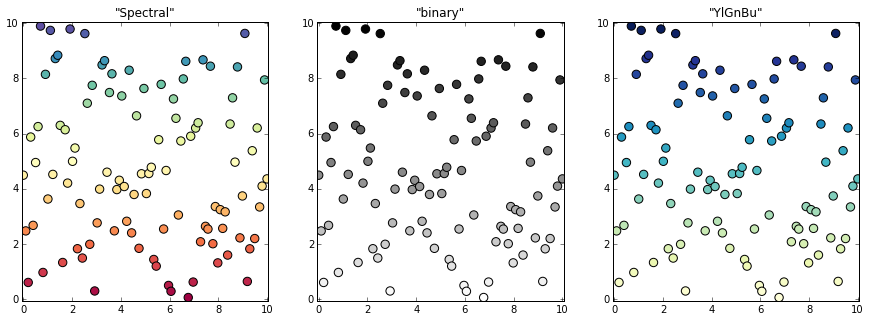

In [11]:
np.random.seed(my_seed)

# data
U = 10; N = 100
x = np.linspace(0, U, N)
y = U * np.random.rand(N)
c = y # y coordinate defines the color

# plotting
fig, ax = plt.subplots(1,3, figsize = (15, 5))
ax[0].set(title = "\"Spectral\"", xlim = (-0.05, U + 0.05), ylim = (-0.05, U + 0.05))
_tmp = ax[0].scatter(x, y, c = c, s = 70, cmap = plt.get_cmap("Spectral"))

ax[1].set(title = "\"binary\"", xlim = (-0.05, U + 0.05), ylim = (-0.05, U + 0.05))
_tmp = ax[1].scatter(x, y, c = c, s = 70, cmap = plt.get_cmap("binary"))
          
ax[2].set(title = "\"YlGnBu\"", xlim = (-0.05, U + 0.05), ylim = (-0.05, U + 0.05))
_tmp = ax[2].scatter(x, y, c = c, s = 70, cmap = plt.get_cmap("YlGnBu"))

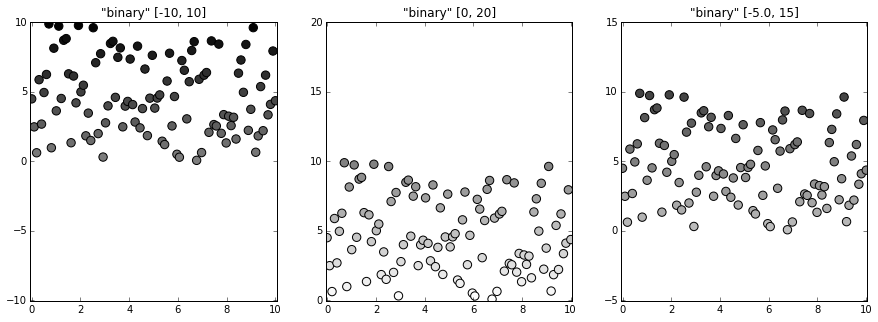

In [12]:
np.random.seed(my_seed)

# data
U = 10; N = 100
x = np.linspace(0, U, N)
y = U * np.random.rand(N)
c = y # y coordinate defines the color

# plotting
fig, ax = plt.subplots(1,3, figsize = (15, 5))
ax[0].set(title = "\"binary\" [{0}, {1}]".format(-U, U), xlim = (-0.05, U + 0.05), ylim = (-U -0.05, U + 0.05))
_tmp = ax[0].scatter(x, y, c = c, s = 70, cmap = plt.get_cmap("binary"), vmin = -U, vmax = U)

ax[1].set(title = "\"binary\" [{0}, {1}]".format(0, 2*U), xlim = (-0.05, U + 0.05), ylim = (-0.05, 2*U + 0.05))
_tmp = ax[1].scatter(x, y, c = c, s = 70, cmap = plt.get_cmap("binary"), vmin = 0, vmax = 2*U)
          
ax[2].set(title = "\"binary\" [{0}, {1}]".format(-U/2, int(3*U/2)), xlim = (-0.05, U + 0.05), ylim = (-0.5*U -0.05, 1.5*U + 0.05))
_tmp = ax[2].scatter(x, y, c = c, s = 70, cmap = plt.get_cmap("binary"), vmin = -0.5*U, vmax = 1.5*U)

## Plot

### One, two, many lines - with colors

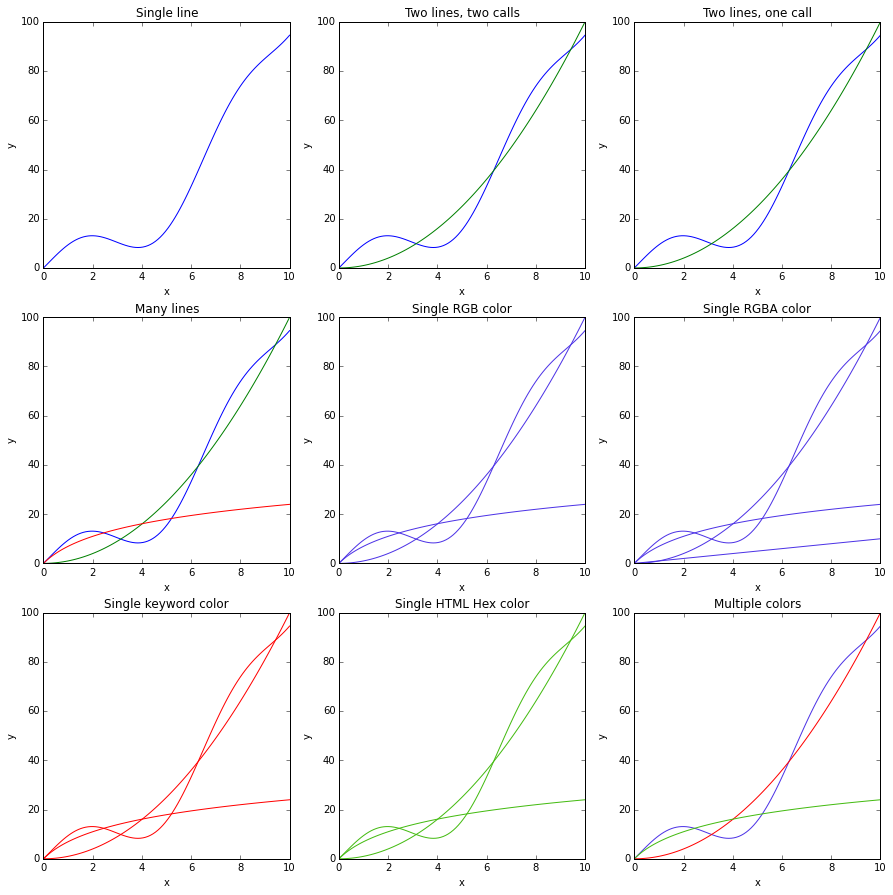

In [13]:
np.random.seed(my_seed)

# data
U = 10; N = 100
x = np.linspace(0, U, N)
y1 = np.square(x) + 10*np.sin(x)
y2 = np.square(x)
y3 = 10 * np.log(1+x)
y4 = x

# plotting
fig, ax = plt.subplots(3, 3, figsize = (15, 15))
ax[0,0].set(title = 'Single line', xlabel = 'x', ylabel = 'y')
_tmp = ax[0,0].plot(x, y1)

ax[0,1].set(title = 'Two lines, two calls', xlabel = 'x', ylabel = 'y')
_tmp = ax[0,1].plot(x, y1)
_tmp = ax[0,1].plot(x, y2)

ax[0,2].set(title = 'Two lines, one call', xlabel = 'x', ylabel = 'y')
_tmp = ax[0,2].plot(x, y1, x, y2)

ax[1,0].set(title = 'Many lines', xlabel = 'x', ylabel = 'y')
_tmp = ax[1,0].plot(x, y1, x, y2, x, y3)

ax[1,1].set(title = 'Single RGB color', xlabel = 'x', ylabel = 'y')
rgb = [0.3, 0.2, 0.9]
_tmp = ax[1,1].plot(x, y1, x, y2, x, y3, c = rgb)

ax[1,2].set(title = 'Single RGBA color', xlabel = 'x', ylabel = 'y')
rgba = [0.3, 0.2, 0.9, 1.0]
_tmp = ax[1,2].plot(x, y1, x, y2, x, y3, x, y4, c = rgba)

ax[2,0].set(title = 'Single keyword color', xlabel = 'x', ylabel = 'y')
_tmp = ax[2,0].plot(x, y1, x, y2, x, y3, c = "red")

ax[2,1].set(title = 'Single HTML Hex color', xlabel = 'x', ylabel = 'y')
_tmp = ax[2,1].plot(x, y1, x, y2, x, y3, c = "#44bb11")

ax[2,2].set(title = 'Multiple colors', xlabel = 'x', ylabel = 'y')
_tmp = ax[2,2].plot(x, y1, c = [0.3, 0.2, 0.9])
_tmp = ax[2,2].plot(x, y2, c = "red")
_tmp = ax[2,2].plot(x, y3, c = "#44bb11")


### Markers and linewidths

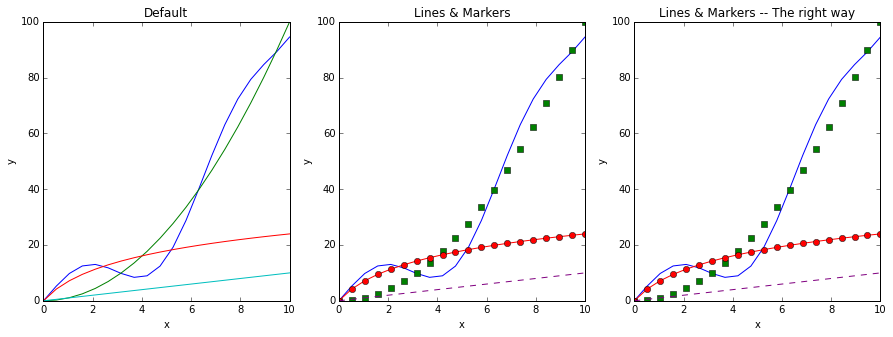

In [14]:
np.random.seed(my_seed)

# data
U = 10; N = 20
x = np.linspace(0, U, N)
y1 = np.square(x) + 10*np.sin(x)
y2 = np.square(x)
y3 = 10 * np.log(1+x)
y4 = x

# plotting
fig, ax = plt.subplots(1, 3, figsize = (15, 5))
ax[0].set(title = 'Default', xlabel = 'x', ylabel = 'y')
_tmp = ax[0].plot(x, y1, x, y2, x, y3, x, y4,)

ax[1].set(title = 'Lines & Markers', xlabel = 'x', ylabel = 'y')
_tmp = ax[1].plot(x, y1)
_tmp = ax[1].plot(x, y2, 's')
_tmp = ax[1].plot(x, y3, 'o-', c = "red")
_tmp = ax[1].plot(x, y4, '--', c = "purple")

ax[2].set(title = 'Lines & Markers -- The right way', xlabel = 'x', ylabel = 'y')
_tmp = ax[2].plot(x, y1, label = "Default")
_tmp = ax[2].plot(x, y2, color = "green", linestyle = "-", linewidth = 0, marker = 's', markerfacecolor = "green", markersize = 6)
_tmp = ax[2].plot(x, y3, color = "red", linestyle = "-", marker = "o", markerfacecolor = "red", markersize = 6)
_tmp = ax[2].plot(x, y4, color = "purple", linestyle = "--")

## Bar

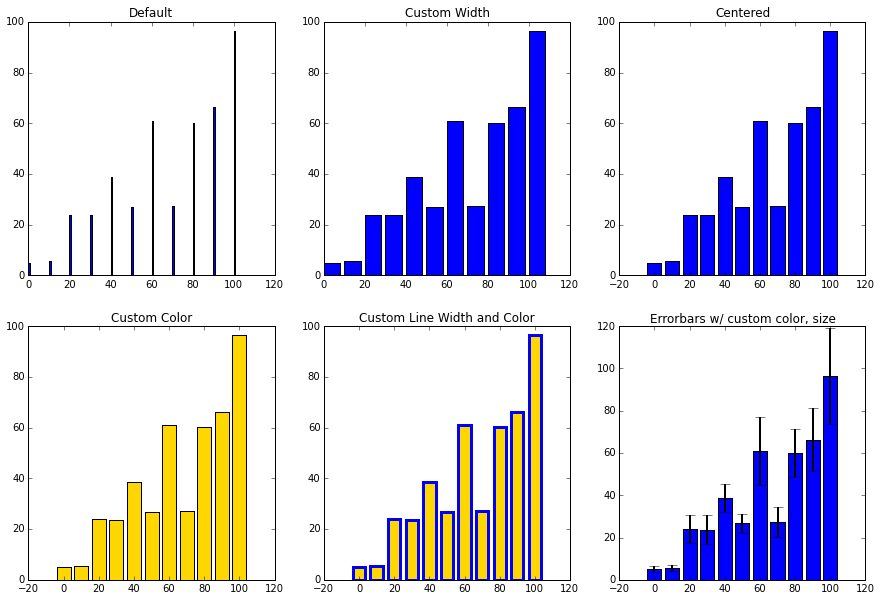

In [16]:
np.random.seed(my_seed)

# data
U = 100; N = 11
x = np.linspace(0, U, N)
h = 5 + np.random.rand(N) * x

# plotting
fig, ax = plt.subplots(2, 3, figsize = (15, 10))

ax[0,0].set(title = "Default")
_tmp = ax[0,0].bar(x, h)

ax[0,1].set(title = "Custom Width")
dw = 0.8* (x[1] - x[0])
_tmp = ax[0,1].bar(x, h, width = dw)

ax[0,2].set(title = "Centered")
dw = 0.8* (x[1] - x[0])
_tmp = ax[0,2].bar(x, h, width = dw, align = "center")


ax[1,0].set(title = "Custom Color")
dw = 0.8* (x[1] - x[0])
_tmp = ax[1,0].bar(x, h, width = dw, color = "gold", align = "center")

ax[1,1].set(title = "Custom Line Width and Color")
dw = 0.7* (x[1] - x[0])
_tmp = ax[1,1].bar(x, h, width = dw, color = "gold", linewidth = 3, edgecolor = "blue", align = "center")

ax[1,2].set(title = "Errorbars w/ custom color, size")
dw = 0.8* (x[1] - x[0])
y_errors = 0.15 * h * (1 + np.random.rand(N))
_tmp = ax[1,2].bar(x, h, width = dw, yerr = y_errors, ecolor = "black", capsize = 5, error_kw = {"linewidth": 2}, align = "center")

### Multiple Bar Plots

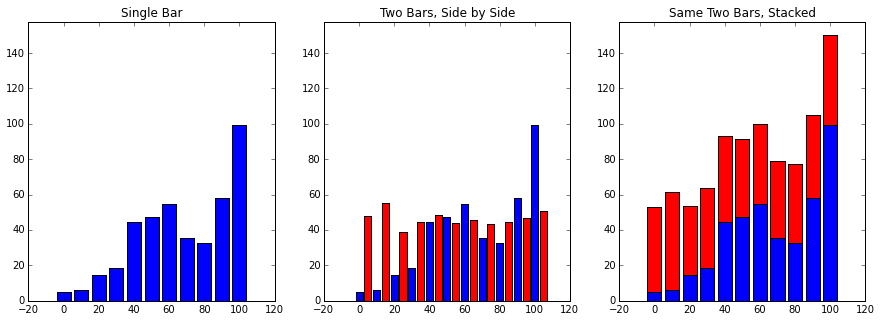

In [17]:
np.random.seed(my_seed)

# data
U = 100; N = 11
x1 = np.linspace(0, U, N)
h1 = 5 + np.random.rand(N) * x1

offset = (x1[1] - x1[0]) / 2
dw = 0.8 * offset

x2 = x1 + offset
h2 = np.mean(h1) * (1 + 0.5 * np.random.rand(N))

# plotting
fig, ax = plt.subplots(1, 3, figsize = (15, 5))

ax[0].set(title = "Single Bar", ylim = (0, 1.05 * max(h1 + h2)))
_tmp = ax[0].bar(x1, h1, width = 2*dw, align = "center")

ax[1].set(title = "Two Bars, Side by Side", ylim = (0, 1.05 * max(h1 + h2)))
_tmp = ax[1].bar(x1, h1, width = dw, align = "center")
_tmp = ax[1].bar(x2, h2, width = dw, align = "center", color = "red")

ax[2].set(title = "Same Two Bars, Stacked", ylim = (0, 1.05 * max(h1 + h2)))
_tmp = ax[2].bar(x1, h1, width = 2*dw, align = "center")
_tmp = ax[2].bar(x1, h2, width = 2*dw, bottom = h1, align = "center", color = "red")



## Histogram

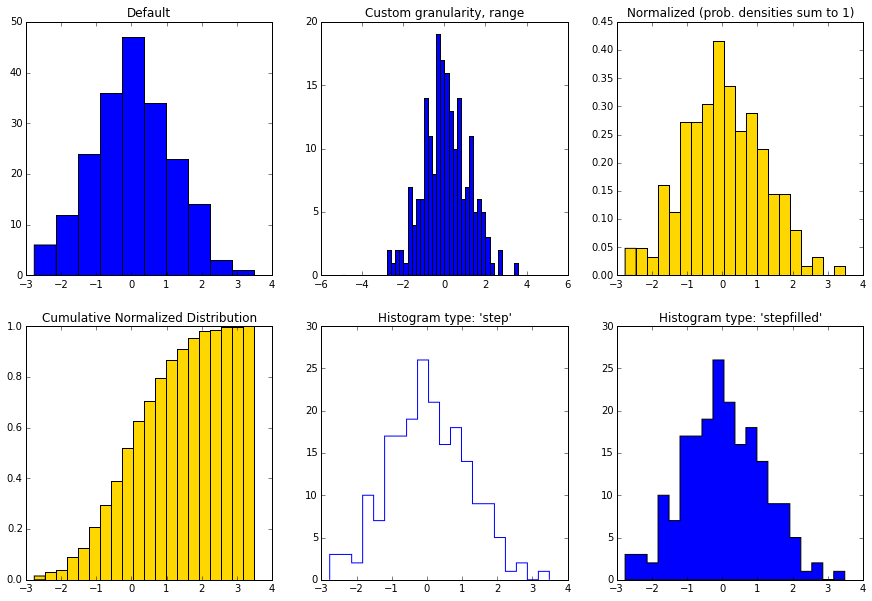

In [18]:
np.random.seed(my_seed)

# data
N = 200
x = np.random.normal(0, 1, N)

# plotting
fig, ax = plt.subplots(2, 3, figsize = (15, 10))

ax[0,0].set(title = "Default")
_tmp = ax[0,0].hist(x)

ax[0,1].set(title = "Custom granularity, range")
_tmp = ax[0,1].hist(x, bins = 50, range = (-5, 5))

ax[0,2].set(title = "Normalized (prob. densities sum to 1)")
_tmp = ax[0,2].hist(x, bins = 20, normed = True, color = "gold")

ax[1,0].set(title = "Cumulative Normalized Distribution", ylim = (0, 1))
_tmp = ax[1,0].hist(x, bins = 20, normed = True, cumulative = True, color = "gold")

ax[1,1].set(title = "Histogram type: 'step'")
_tmp = ax[1,1].hist(x, bins = 20, histtype = "step")

ax[1,2].set(title = "Histogram type: 'stepfilled'")
_tmp = ax[1,2].hist(x, bins = 20, histtype = "stepfilled")

### Multiple Histograms

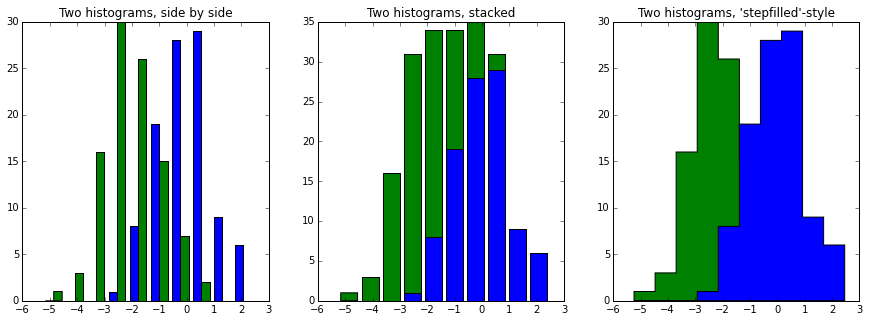

In [19]:
np.random.seed(my_seed)

# data
N = 100
x1 = np.random.normal(0, 1, N)
x2 = np.random.normal(-2, 1, N)

# plotting
fig, ax = plt.subplots(1, 3, figsize = (15, 5))

ax[0].set(title = "Two histograms, side by side")
_tmp = ax[0].hist([x1, x2], stacked = False)

ax[1].set(title = "Two histograms, stacked")
_tmp = ax[1].hist([x1, x2], stacked = True)

ax[2].set(title = "Two histograms, 'stepfilled'-style")
_tmp = ax[2].hist([x1, x2], stacked = False, histtype = "stepfilled")

## Pie

In [20]:
def value_labels(x):
    return ["{0:.2f}".format(n) for n in x]

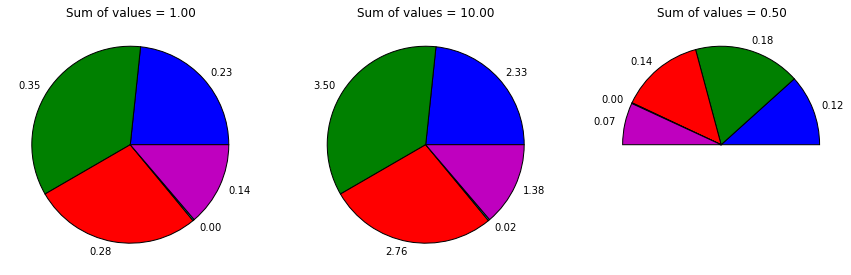

In [21]:
np.random.seed(my_seed)

# data
N = 5
x = np.random.rand(N); x /= sum(x)
y = 10 * x
z = 0.5 * x / sum(x)

# plotting
fig, ax = plt.subplots(1,3, figsize = (15, 5))

ax[0].set(title = "Sum of values = {0:.2f}".format(sum(x)), aspect = 1)
_tmp = ax[0].pie(x, labels = value_labels(x))
ax[1].set(title = "Sum of values = {0:.2f}".format(sum(y)), aspect = 1)
_tmp = ax[1].pie(y, labels = value_labels(y))
ax[2].set(title = "Sum of values = {0:.2f}".format(sum(z)), aspect = 1)
_tmp = ax[2].pie(z, labels = value_labels(z))

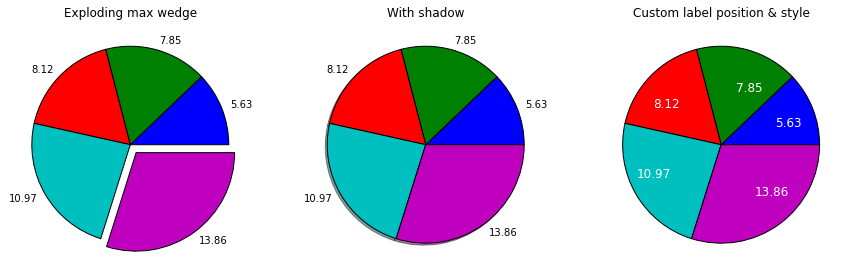

In [68]:
np.random.seed(my_seed)

# data
N = 5
x = np.sort(5 + np.random.exponential(10, N))

# plotting
fig, ax = plt.subplots(1,3, figsize = (15, 7))

ax[0].set(title = "Exploding max wedge".format(sum(x)), aspect = 1)
explosion = N * [0.0]; max_idx = np.argmax(x); explosion[max_idx] = 0.1
_tmp = ax[0].pie(x, explode = explosion, labels = value_labels(x))

ax[1].set(title = "With shadow", aspect = 1)
_tmp = ax[1].pie(x, shadow = True, labels = value_labels(x))

ax[2].set(title = "Custom label position & style", aspect = 1)
_tmp = ax[2].pie(x, labeldistance = 0.6, labels = value_labels(x),
                 textprops = {"fontsize" : 'large', "color": "white"})